In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

## Read in dataset

In [18]:
month1 = pd.read_csv("aug13_decoded", sep='\t')
month2 = pd.read_csv("sep13_decoded", sep='\t')

# merge datasets into df
df = pd.concat([month1, month2])

## Let's inspect the dataset

In [19]:
df.head()

,NodeID,Date Time,Complete Node,Cabinet,Chassis,Slot,Node,Node Type,Processor,Time,...,Cache way in error,Syndrome,Core,Errorcode,Ext_errorcode,Error Type,Addr,Addr Desc,Errorcode Type,Misc
0,70,2013-08-01 00:01:24,c19-7c1s7n1,19-7,1.0,7.0,1.0,xe,2:600f12,1.375333e+09,...,NaN,'110000100,0.0,'100001011,'11100,"L3 Cache Data Error, Single bit Error, Cache W...",0d1c4,Physical,mem,c00a000001000000
1,70,2013-08-01 00:05:46,c17-0c1s7n0,17-0,1.0,7.0,0.0,xk,2:600f12,1.375334e+09,...,NaN,'100101110,NaN,'100000010011,'1000,ECC Error,44bd7910,Physical,bus,c00a002f01000000
2,70,2013-08-01 00:06:24,c12-7c2s6n1,12-7,2.0,6.0,1.0,xe,2:600f12,1.375334e+09,...,NaN,'1110110100100000,NaN,'101000010011,'1000,ECC Error,483b3e350,Physical,bus,c00a000101000000
3,70,2013-08-01 00:06:24,c10-9c0s7n3,10-9,0.0,7.0,3.0,xe,2:600f12,1.375334e+09,...,NaN,'10,7.0,'100011011,'11100,"L3 Cache Data Error, Single bit Error, Cache W...",411bf0e44,Physical,mem,c00a000001000000
4,70,2013-08-01 00:06:27,c19-5c2s3n3,19-5,2.0,3.0,3.0,xe,2:600f12,1.375334e+09,...,NaN,'1001110100000001,NaN,'101000010011,'1000,ECC Error,4854e0c40,Physical,bus,c00a000101000000


In [20]:
df.keys()

Index(['NodeID', 'Date Time', 'Complete Node', 'Cabinet', 'Chassis', 'Slot',
       'Node', 'Node Type', 'Processor', 'Time', 'Socket', 'Apic', 'Bank',
       'Err Val', 'OV', 'UC', 'PCC', 'CECC', 'UECC', 'DEF', 'POISON',
       'L3 Subcache', 'Sub Link', 'LDT Link', 'Scrub', 'Link',
       'Cache way in error', 'Syndrome', 'Core', 'Errorcode', 'Ext_errorcode',
       'Error Type', 'Addr', 'Addr Desc', 'Errorcode Type', 'Misc'],
      dtype='object')

In [21]:
# J: how do these columns look?
print(df['Node Type'].value_counts())


xe                     367250
xk                      11372
service                 11064
service_not_present      9759
Name: Node Type, dtype: int64


## Looks like we have some timestamps in the 'Time' column.
## Let's convert these to human readable timestamps

In [22]:
df['datetime'] = pd.to_datetime(df['Time'], unit='s')
#df['datetime'] = df['datetime'].dt.tz_localize('America/Chicago', ambiguous=True)


In [23]:
print(min(df['datetime']))
print(max(df['datetime']))

1970-01-01 00:00:01
2013-10-01 04:58:06


## Hmm, we shouldn't have timestamps from 1970. This is probably bad data.
## Let's filter out these bad entries

In [24]:
# keep entries between July 31st and Oct 2nd
df = df[(1375315199 < df['Time']) & (df['Time'] < 1380585600)]

# If you open up the datasets in a text editor, you'll see that 
# Node Type entries with 'service_not_present' have incomplete information
df = df[df['Node Type'] != 'service_not_present']

In [25]:
print(min(df['datetime']))
print(max(df['datetime']))

2013-08-01 04:26:05
2013-09-30 23:59:49


## Much better

## Task 0 - Let's count some columns


In [26]:
# total number of entries
len(df)

388393

In [27]:
# number of nodes
len(df['Complete Node'].unique())

6203

In [28]:
# number of days
# normalize() sets the time to 00:00:00 giving us only the date portion of the timestamp/
len(df['datetime'].dt.normalize().unique())

59

In [29]:
# node types
df['Node Type'].unique()

array(['xe', 'xk', 'service'], dtype=object)

In [30]:
df['Complete Node'].value_counts()

# don't forget to represent this data as a box plot

c13-4c0s2n0     20674
c18-7c1s2n3     20607
c21-5c0s3n0     20522
c0-11c2s3n1     20506
c1-3c2s7n1      19321
c16-9c2s2n0     14425
c8-0c1s7n3      10387
c13-7c0s6n1      9156
c16-11c2s3n3     9115
c22-10c1s3n2     7131
c5-4c2s3n3       6619
c8-6c2s7n3       6409
c13-9c0s1n0      5987
c17-3c2s2n3      5745
c22-8c2s5n0      5708
c3-8c0s4n3       5125
c9-1c1s1n0       4994
c3-7c0s5n3       4778
c7-8c1s0n1       4006
c19-5c2s7n1      3589
c5-3c0s5n1       3164
c7-10c2s1n1      2984
c6-11c2s0n2      2965
c5-5c1s0n2       2883
c13-11c2s3n1     2758
c7-11c1s2n1      2598
c19-9c2s7n0      2520
c3-0c2s7n3       2449
c7-8c1s4n2       2341
c15-3c2s7n1      2241
                ...  
c0-9c1s4n1          1
c2-7c0s3n1          1
c18-5c1s7n3         1
c15-10c0s4n2        1
c7-6c1s1n0          1
c17-3c2s6n3         1
c21-10c1s2n0        1
c23-4c1s1n3         1
c22-7c0s4n1         1
c23-8c1s4n2         1
c2-4c0s7n2          1
c1-8c1s3n3          1
c21-3c2s3n0         1
c6-6c1s7n2          1
c6-6c0s0n3

In [35]:
#BEFORE

timevals = df['Time'].values

# this finds the difference between consecutive values in timevals
diffs = timevals[1:] - timevals[:-1]
diffs.mean(), diffs.std()

(13.528661764402974, 392.26577084991305)

In [37]:
for nt in ['service', 'xe', 'xk']:
    timevals = df2[df2['Node Type'] == nt]['Time'].values
    timevals.sort()
    diffs = timevals[1:] - timevals[:-1]
    print (nt, diffs.mean(), diffs.std())

service 477.700736565 3369.04349542
xe 14.3476951144 406.680775251
xk 467.420612318 2817.94370287


There are 6 errors that were both UECC = 1 (Uncorrectable ECC/Chipkill error) and UC = 0 (Error Uncorrected) which means they were uncorrected uncorrectable errors.

From lecture 4 presentation, slide 5:

ERROR:
"Upon activation (invoking the faulty
component by applying an input) the fault
becomes active and produces an error"
"Upon activation the fault become active and
produces an error"

FAILURE:
"If and when this faulty value is used (i.e the
memory location is activated - the error
affects the delivered service (e.g.,
information content), a failure occurs"
"When the error affects the delivered service , a
failure occurs"

In [39]:
print(diffs)
print(diffs[0].dtype)
print(diffs.dtype)


[  450.   150.    75. ...,  1587.   150.  1001.]
float64
float64


In [40]:
unique, counts = np.unique(diffs, return_counts=True)

In [44]:
np.sum(counts)

11236

In [45]:
probs = counts/len(diffs)

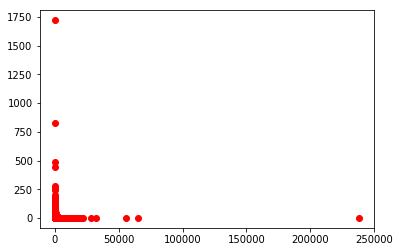

In [46]:
import matplotlib.pyplot as plt
plt.plot(unique, counts, 'ro')

# plt.axis([0, 6, 0, 20])
plt.show()

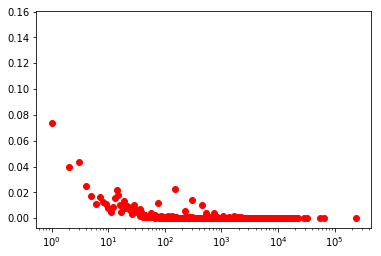

In [47]:
plt.semilogx(unique, probs, 'ro')

# plt.axis([0, 6, 0, 20])
plt.show()

The pdf of Time to MCE Distribution demonstates a Weibull Distribution with a Beta value < 1.

Resource: http://www.weibull.com/hotwire/issue14/relbasics14.htm

In [48]:
# Percentage of MCEs caused by memory errors

subset = df[df['Error Type'] == 'ECC Error']
len(subset)
len(df)
percentage = len(subset)/len(df)
print('Percentage of MCEs caused by memory errors = {:.2f}%'.format(100*percentage))

Percentage of MCEs caused by memory errors = 61.42%


In [55]:
df['Error Type'].loc[df['Error Type'].str.contains('L3') == True] = 'L3 Cache Error'
df['Error Type'].loc[df['Error Type'].str.contains('L2') == True] = 'L2 Cache Error'
df['Error Type'].loc[df['Error Type'].str.contains('Probe') == True] = 'Probe Filter Error'
df['Error Type'].loc[df['Error Type'].str.contains('Instruction') == True] = 'Instruction Cache Error'
df['Error Type'].unique()

C:\Users\alvaro2\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


array(['ECC Error', 'L3 Cache Error', 'Probe Filter Error',
       'L2 Cache Error', 'Instruction Cache Error', nan, 'Reserved',
       'DataCopyBack_Evict', 'Internal Error : IDRF Array Parity',
       'TLB : TLbpar', 'Data Cache Error : Data Array', 'Line Fill Error'], dtype=object)

ECC Error                             238564
L3 Cache Error                         84892
Probe Filter Error                     53167
L2 Cache Error                          7101
Instruction Cache Error                 1790
Reserved                                  38
Data Cache Error : Data Array              5
DataCopyBack_Evict                         4
TLB : TLbpar                               3
Internal Error : IDRF Array Parity         1
Line Fill Error                            1
Name: Error Type, dtype: int64


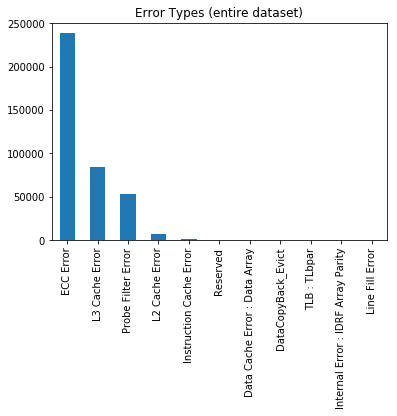

In [60]:
errors = df['Error Type'].value_counts()
print(errors)
errors.plot(kind='bar', title='Error Types (entire dataset)')
plt.show()

ECC Error                             216853
L3 Cache Error                         84570
Probe Filter Error                     53126
L2 Cache Error                          6966
Instruction Cache Error                 1779
Reserved                                  37
Data Cache Error : Data Array              5
TLB : TLbpar                               3
Internal Error : IDRF Array Parity         1
Line Fill Error                            1
Name: Error Type, dtype: int64


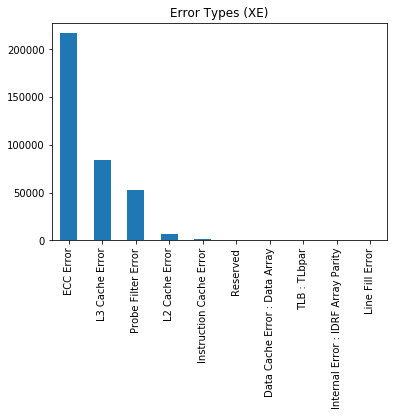

In [61]:
subset = df[df['Node Type'] == 'xe']
errors = subset['Error Type'].value_counts()
print(errors)
errors.plot(kind='bar', title='Error Types (XE)')
plt.show()

ECC Error                  10760
L3 Cache Error               285
L2 Cache Error               132
Probe Filter Error            41
Instruction Cache Error       11
Reserved                       1
DataCopyBack_Evict             1
Name: Error Type, dtype: int64


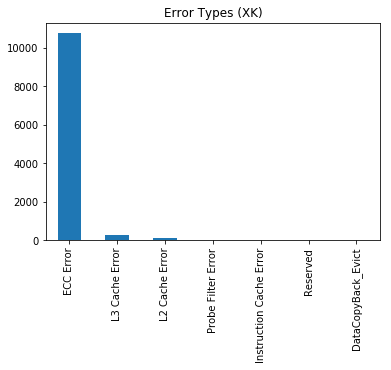

In [62]:
subset = df[df['Node Type'] == 'xk']
errors = subset['Error Type'].value_counts()
print(errors)
errors.plot(kind='bar', title='Error Types (XK)')
plt.show()

ECC Error             10951
L3 Cache Error           37
DataCopyBack_Evict        3
L2 Cache Error            3
Name: Error Type, dtype: int64


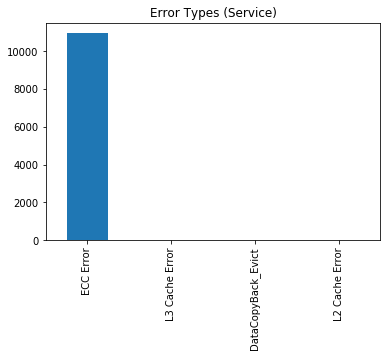

In [63]:
subset = df[df['Node Type'] == 'service']
errors = subset['Error Type'].value_counts()
print(errors)
errors.plot(kind='bar', title='Error Types (Service)')
plt.show()

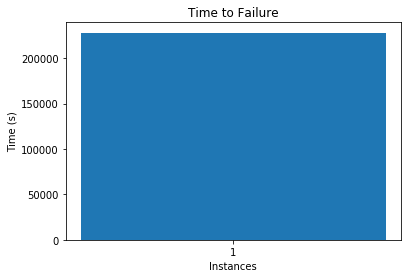

In [145]:
uncorrectable = df[(df['UECC'] == 1) & (df['UC'] == 1)]
ttf = uncorrectable['datetime'] - df['datetime'].iloc[0]
ttf = uncorrectable['datetime'].values[0] - np.datetime64(df['datetime'].iloc[0].to_pydatetime())
ttf.astype('timedelta64[s]')
plt.bar(['1'], [227904])
plt.xlabel('Instances')
plt.title('Time to Failure')
plt.ylabel('Time (s)')
plt.show()

In [152]:
fname = 'syndrome_x8.txt'
header = ['12h', '11h', '10h', 'Fh', 'Eh', 'Dh', 'Ch', 'Bh', 'Ah', '09h', '08h', '07h', '06h', '05h', '04h', '03h', '02h', '01h', '00h']
x8_lut = pd.read_csv(fname, delim_whitespace=True, index_col=0, header=None, names=header)
def syndrome_lut(syndrome):
    header = ['12h', '11h', '10h', 'Fh', 'Eh', 'Dh', 'Ch', 'Bh', 'Ah', '09h', '08h', '07h', '06h', '05h', '04h', '03h', '02h', '01h', '00h']
    syndrome = str(syndrome).lstrip("'")
    syndrome = int(syndrome, 2)
    syndrome = str.format('{:04X}', syndrome)
    suffix = syndrome[2:]
    prefix = syndrome[:2]
    for col, value in enumerate(x8_lut.loc[suffix]):
        if syndrome == value:
            return str(bin(int(suffix, 16)))[2:].count('1')
    for col, value in enumerate(x8_lut.loc[prefix]):
        if syndrome == value:
            return str(bin(int(prefix, 16)))[2:].count('1')

In [160]:
slice = df[df['Error Type'] == 'ECC Error']
slice['Error Bits'] = slice['Syndrome'].apply(syndrome_lut)

C:\Users\alvaro2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1    226684
2      5514
3      2012
4      1638
5      1176
6       697
7       516
8       327
Name: Error Bits, dtype: int64


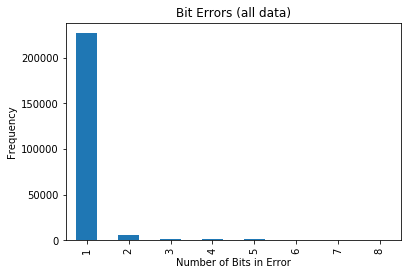

In [172]:
counts = slice['Error Bits'].value_counts()
counts.plot(kind='bar', title='Bit Errors (all data)')
print(counts)
plt.xlabel('Number of Bits in Error')
plt.ylabel('Frequency')
plt.show()

1    206207
2      4946
3      1816
4      1464
5      1010
6       595
7       496
8       319
Name: Error Bits, dtype: int64


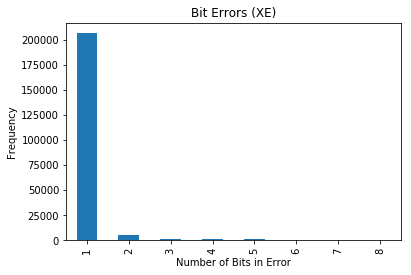

In [174]:
subset = slice[slice['Node Type'] == 'xe']
counts = subset['Error Bits'].value_counts()
counts.plot(kind='bar', title='Bit Errors (XE)')
print(counts)
plt.xlabel('Number of Bits in Error')
plt.ylabel('Frequency')
plt.show()

1    9530
2     568
3     196
4     174
5     166
6     102
7      19
8       5
Name: Error Bits, dtype: int64


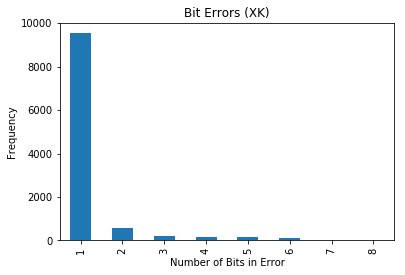

In [175]:
subset = slice[slice['Node Type'] == 'xk']
counts = subset['Error Bits'].value_counts()
counts.plot(kind='bar', title='Bit Errors (XK)')
print(counts)
plt.xlabel('Number of Bits in Error')
plt.ylabel('Frequency')
plt.show()

1    10947
8        3
7        1
Name: Error Bits, dtype: int64


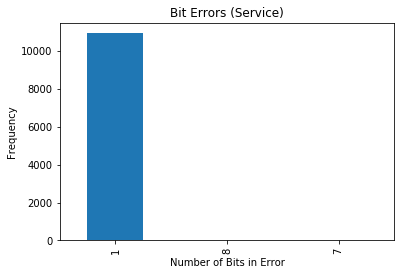

In [176]:
subset = slice[slice['Node Type'] == 'service']
counts = subset['Error Bits'].value_counts()
counts.plot(kind='bar', title='Bit Errors (Service)')
print(counts)
plt.xlabel('Number of Bits in Error')
plt.ylabel('Frequency')
plt.show()

In [187]:
subset = slice[slice['Error Bits'] > 1]
differences = subset['datetime'].diff()
differences.describe()

count                     11879
mean     0 days 00:07:21.930886
std      0 days 00:44:46.960777
min             0 days 00:00:00
25%             0 days 00:00:00
50%             0 days 00:00:18
75%             0 days 00:02:56
max             2 days 16:39:59
Name: datetime, dtype: object

In [188]:
sub = subset[subset['Node Type'] == 'xe']
differences = sub['datetime'].diff()
differences.describe()

count                     10645
mean     0 days 00:08:11.313292
std      0 days 00:49:57.937234
min             0 days 00:00:00
25%             0 days 00:00:00
50%             0 days 00:00:10
75%             0 days 00:02:30
max             2 days 16:39:59
Name: datetime, dtype: object

In [189]:
sub = subset[subset['Node Type'] == 'xk']
differences = sub['datetime'].diff()
differences.describe()

count                      1229
mean     0 days 01:10:54.676159
std      0 days 07:35:05.558328
min             0 days 00:00:00
25%             0 days 00:00:22
50%             0 days 00:02:30
75%             0 days 00:27:30
max             6 days 04:40:39
Name: datetime, dtype: object

In [190]:
sub = subset[subset['Node Type'] == 'service']
differences = sub['datetime'].diff()
differences.describe()

count                         3
mean            0 days 00:54:10
std      0 days 00:40:06.241883
min             0 days 00:12:30
25%             0 days 00:35:00
50%             0 days 00:57:30
75%             0 days 01:15:00
max             0 days 01:32:30
Name: datetime, dtype: object